**Chapter 10 – Introduction to Artificial Neural Networks with Keras**

_This notebook contains all the sample code and solutions to the exercises in chapter 10._

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/10_neural_nets_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml2/blob/add-kaggle-badge/10_neural_nets_with_keras.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


# Perceptrons

**Note**: we set `max_iter` and `tol` explicitly to avoid warnings about the fact that their default value will change in future versions of Scikit-Learn.

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [4]:
y_pred

array([1])

Saving figure perceptron_iris_plot


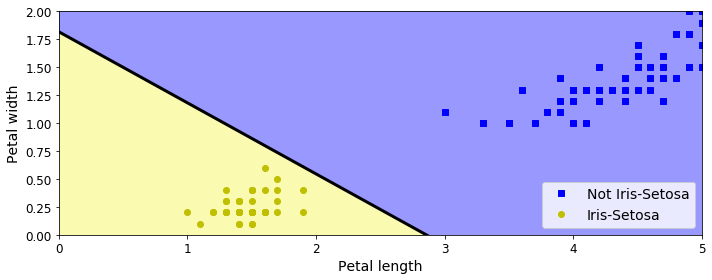

In [5]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

# Activation functions

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

Saving figure activation_functions_plot


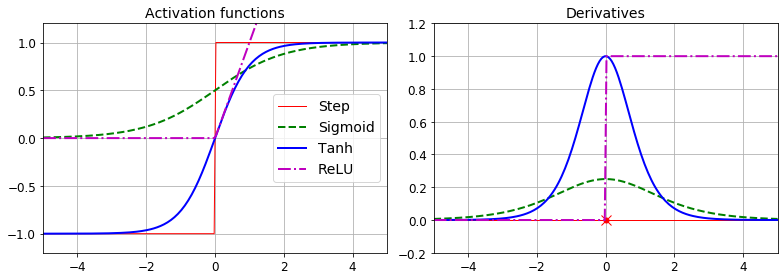

In [7]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [8]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

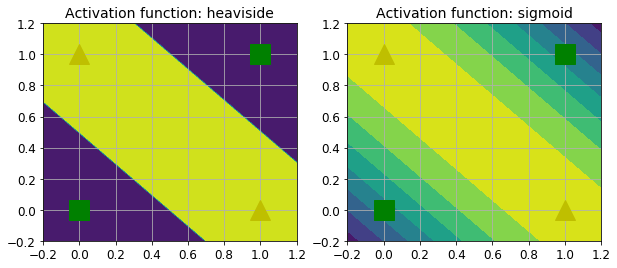

In [9]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# Building an Image Classifier

First let's import TensorFlow and Keras.

In [10]:
import tensorflow as tf
from tensorflow import keras

In [10]:
tf.__version__

'2.4.1'

In [11]:
keras.__version__

'2.4.0'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [11]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


The training set contains 60,000 grayscale images, each 28x28 pixels:

In [12]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [13]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [14]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

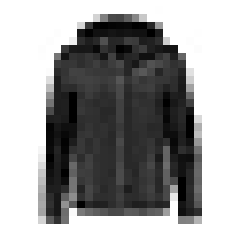

In [15]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [16]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [17]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [18]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [19]:
X_valid.shape

(5000, 28, 28)

In [21]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

Saving figure fashion_mnist_plot


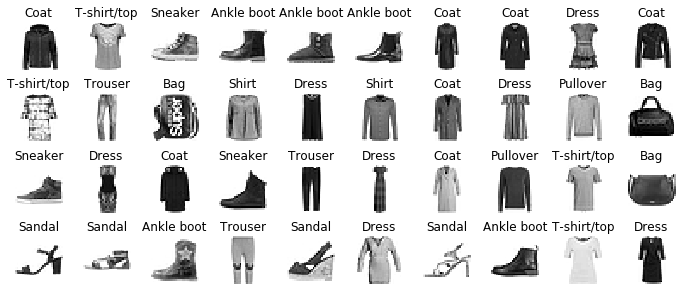

In [20]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [21]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [22]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [23]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [24]:
model.layers

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [28]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [29]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [30]:
model.get_layer(hidden1.name) is hidden1

True

In [31]:
weights, biases = hidden1.get_weights()

In [32]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [33]:
weights.shape

(784, 300)

In [34]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [35]:
biases.shape

(300,)

In [37]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

In [38]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.7237 - accuracy: 0.7645 - val_loss: 0.5207 - val_accuracy: 0.8228
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4844 - accuracy: 0.8318 - val_loss: 0.4350 - val_accuracy: 0.8538
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4394 - accuracy: 0.8455 - val_loss: 0.5325 - val_accuracy: 0.7990
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4128 - accuracy: 0.8566 - val_loss: 0.3921 - val_accuracy: 0.8650
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3943 - accuracy: 0.8621 - val_loss: 0.3747 - val_accuracy: 0.8692
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3755 - accuracy: 0.8673 - val_loss: 0.3711 - val_accuracy: 0.8722
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3637 - accuracy: 0.8716 - val_loss: 0.3609 - val_accuracy:

In [39]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [40]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [41]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Saving figure keras_learning_curves_plot


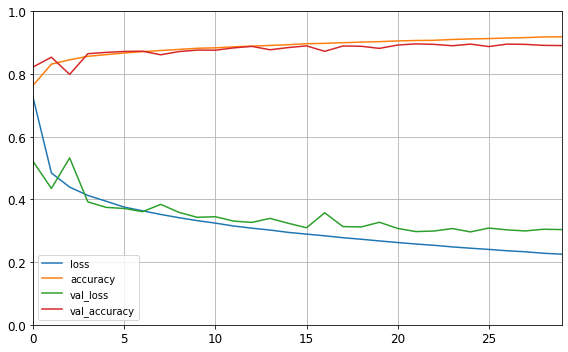

In [42]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [43]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 797us/step - loss: 0.3366 - accuracy: 0.8831


[0.33662697672843933, 0.8830999732017517]

In [44]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

**Warning**: `model.predict_classes(X_new)` is deprecated. It is replaced with `np.argmax(model.predict(X_new), axis=-1)`.

In [45]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1])

In [46]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [47]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Saving figure fashion_mnist_images_plot


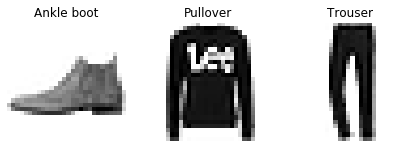

In [48]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

# Regression MLP

Let's load, split and scale the California housing dataset (the original one, not the modified one as in chapter 2):

In [49]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [50]:
np.random.seed(42)
tf.random.set_seed(42)

In [118]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 864us/step - loss: 2.4137 - val_loss: 3.2644
Epoch 2/20
363/363 [==============================] - 0s 648us/step - loss: 0.8024 - val_loss: 1.1689
Epoch 3/20
363/363 [==============================] - 0s 655us/step - loss: 0.6342 - val_loss: 0.6419
Epoch 4/20
363/363 [==============================] - 0s 656us/step - loss: 0.5831 - val_loss: 0.5423
Epoch 5/20
363/363 [==============================] - 0s 716us/step - loss: 0.5513 - val_loss: 0.5083
Epoch 6/20
363/363 [==============================] - 0s 659us/step - loss: 0.5276 - val_loss: 0.4881
Epoch 7/20
363/363 [==============================] - 0s 672us/step - loss: 0.5083 - val_loss: 0.4713
Epoch 8/20
363/363 [==============================] - 0s 662us/step - loss: 0.4935 - val_loss: 0.4571
Epoch 9/20
363/363 [==============================] - 0s 655us/step - loss: 0.4806 - val_loss: 0.4455
Epoch 10/20
363/363 [==============================] - 0s 657us/step - loss: 0.470

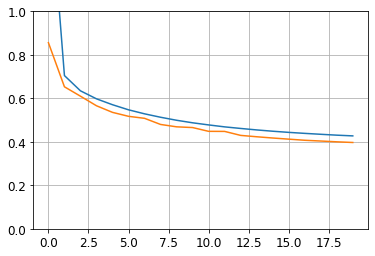

In [52]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [53]:
y_pred

array([[0.38856643],
       [1.6792021 ],
       [3.1022794 ]], dtype=float32)

# Functional API

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network (see [paper](https://ai.google/research/pubs/pub45413)) connects all or part of the inputs directly to the output layer.

In [54]:
np.random.seed(42)
tf.random.set_seed(42)

In [55]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [55]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]                

In [56]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

/Users/mariaoskars/anaconda3/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.2611 - val_loss: 3.3940
Epoch 2/20
363/363 [==============================] - 0s 819us/step - loss: 0.6580 - val_loss: 0.9360
Epoch 3/20
363/363 [==============================] - 0s 930us/step - loss: 0.5878 - val_loss: 0.5649
Epoch 4/20
363/363 [==============================] - 0s 911us/step - loss: 0.5582 - val_loss: 0.5712
Epoch 5/20
363/363 [==============================] - 0s 851us/step - loss: 0.5347 - val_loss: 0.5045
Epoch 6/20
363/363 [==============================] - 0s 806us/step - loss: 0.5158 - val_loss: 0.4831
Epoch 7/20
363/363 [==============================] - 0s 854us/step - loss: 0.5002 - val_loss: 0.4639
Epoch 8/20
363/363 [==============================] - 0s 826us/step - loss: 0.4876 - val_loss: 0.4638
Epoch 9/20
363/363 [==============================] - 0s 810us/step - loss: 0.4760 - val_loss: 0.4421
Epoch 10/20
363/363 [==============================] - 0s 819us/step - loss: 0.4659 

What if you want to send different subsets of input features through the wide or deep paths? We will send 5 features (features 0 to 4), and 6 through the deep path (features 2 to 7). Note that 3 features will go through both (features 2, 3 and 4).

In [57]:
np.random.seed(42)
tf.random.set_seed(42)

In [58]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [59]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.8145 - val_loss: 0.8072
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6771 - val_loss: 0.6658
Epoch 3/20
363/363 [==============================] - 0s 956us/step - loss: 0.5979 - val_loss: 0.5687
Epoch 4/20
363/363 [==============================] - 0s 927us/step - loss: 0.5584 - val_loss: 0.5296
Epoch 5/20
363/363 [==============================] - 0s 985us/step - loss: 0.5334 - val_loss: 0.4993
Epoch 6/20
363/363 [==============================] - 0s 834us/step - loss: 0.5120 - val_loss: 0.4811
Epoch 7/20
363/363 [==============================] - 0s 925us/step - loss: 0.4970 - val_loss: 0.4696
Epoch 8/20
363/363 [==============================] - 0s 923us/step - loss: 0.4843 - val_loss: 0.4496
Epoch 9/20
363/363 [==============================] - 0s 878us/step - loss: 0.4730 - val_loss: 0.4404
Epoch 10/20
363/363 [==============================] - 0s 932us/step - loss: 0.4644 - 

Adding an auxiliary output for regularization:

In [60]:
np.random.seed(42)
tf.random.set_seed(42)

In [61]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [62]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

In [63]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.1365 - main_output_loss: 1.9196 - aux_output_loss: 4.0890 - val_loss: 1.6233 - val_main_output_loss: 0.8468 - val_aux_output_loss: 8.6117
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.8905 - main_output_loss: 0.6969 - aux_output_loss: 2.6326 - val_loss: 1.5163 - val_main_output_loss: 0.6836 - val_aux_output_loss: 9.0109
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7429 - main_output_loss: 0.6088 - aux_output_loss: 1.9499 - val_loss: 1.4639 - val_main_output_loss: 0.6229 - val_aux_output_loss: 9.0326
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6771 - main_output_loss: 0.5691 - aux_output_loss: 1.6485 - val_loss: 1.3388 - val_main_output_loss: 0.5481 - val_aux_output_loss: 8.4552
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6381 - main_output_loss: 0.5434 - aux_output_loss: 1.4911 - val_loss

In [64]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 0s 724us/step - loss: 0.4668 - main_output_loss: 0.4178 - aux_output_loss: 0.9082


# The subclassing API

In [65]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [66]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 2.3298 - output_1_loss: 2.2186 - output_2_loss: 3.3304 - val_loss: 2.1435 - val_output_1_loss: 1.1581 - val_output_2_loss: 11.0117
Epoch 2/10
363/363 [==============================] - 0s 870us/step - loss: 0.9714 - output_1_loss: 0.8543 - output_2_loss: 2.0252 - val_loss: 1.7567 - val_output_1_loss: 0.8205 - val_output_2_loss: 10.1825
Epoch 3/10
363/363 [==============================] - 0s 918us/step - loss: 0.8268 - output_1_loss: 0.7289 - output_2_loss: 1.7082 - val_loss: 1.5664 - val_output_1_loss: 0.7913 - val_output_2_loss: 8.5419
Epoch 4/10
363/363 [==============================] - 0s 878us/step - loss: 0.7636 - output_1_loss: 0.6764 - output_2_loss: 1.5477 - val_loss: 1.3088 - val_output_1_loss: 0.6549 - val_output_2_loss: 7.1933
Epoch 5/10
363/363 [==============================] - 0s 885us/step - loss: 0.7211 - output_1_loss: 0.6402 - output_2_loss: 1.4489 - val_loss: 1.1357 - val_output_1_loss: 0.596

# Saving and Restoring

In [67]:
np.random.seed(42)
tf.random.set_seed(42)

In [68]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [69]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 895us/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 0s 698us/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 0s 676us/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 0s 951us/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 0s 884us/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 0s 804us/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 0s 693us/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 0s 681us/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 0s 786us/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 553us/step - loss: 0.438

In [70]:
model.save("my_keras_model.h5")

In [71]:
model = keras.models.load_model("my_keras_model.h5")

In [72]:
model.predict(X_new)

array([[0.5400236],
       [1.6505971],
       [3.0098243]], dtype=float32)

In [73]:
model.save_weights("my_keras_weights.ckpt")

In [74]:
model.load_weights("my_keras_weights.ckpt")

# Using Callbacks during Training

In [76]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [78]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [82]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 0.3771 - val_loss: 0.3805
Epoch 2/10
363/363 [==============================] - 0s 863us/step - loss: 0.3759 - val_loss: 0.4079
Epoch 3/10
363/363 [==============================] - 0s 860us/step - loss: 0.3746 - val_loss: 0.3935
Epoch 4/10
363/363 [==============================] - 0s 857us/step - loss: 0.3731 - val_loss: 0.3821
Epoch 5/10
363/363 [==============================] - 0s 848us/step - loss: 0.3723 - val_loss: 0.3713
Epoch 6/10
363/363 [==============================] - 0s 921us/step - loss: 0.3708 - val_loss: 0.3815
Epoch 7/10
363/363 [==============================] - 0s 928us/step - loss: 0.3701 - val_loss: 0.3741
Epoch 8/10
363/363 [==============================] - 0s 894us/step - loss: 0.3691 - val_loss: 0.3614
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3680 - val_loss: 0.3680
Epoch 10/10
162/162 [==============================] - 0s 671us/step - loss: 0.3667


In [84]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=500,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/500
363/363 [==============================] - 1s 1ms/step - loss: 0.3229 - val_loss: 0.3166
Epoch 2/500
363/363 [==============================] - 0s 688us/step - loss: 0.3232 - val_loss: 0.3126
Epoch 3/500
363/363 [==============================] - 0s 695us/step - loss: 0.3228 - val_loss: 0.3167
Epoch 4/500
363/363 [==============================] - 0s 718us/step - loss: 0.3221 - val_loss: 0.3141
Epoch 5/500
363/363 [==============================] - 0s 738us/step - loss: 0.3223 - val_loss: 0.3091
Epoch 6/500
363/363 [==============================] - 0s 854us/step - loss: 0.3216 - val_loss: 0.3226
Epoch 7/500
363/363 [==============================] - 0s 887us/step - loss: 0.3217 - val_loss: 0.3136
Epoch 8/500
363/363 [==============================] - 0s 944us/step - loss: 0.3212 - val_loss: 0.3133
Epoch 9/500
363/363 [==============================] - 0s 783us/step - loss: 0.3205 - val_loss: 0.3093
Epoch 10/500
363/363 [==============================] - 0s 755us/step - los

In [85]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [86]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

363/363 [==============================] - 0s 777us/step - loss: 0.3171 - val_loss: 0.3317

val/train: 1.05


# TensorBoard

In [89]:
os.curdir

'.'

In [87]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [88]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2021_09_18-12_26_22'

In [90]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [91]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [92]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 1ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/30
363/363 [==============================] - 0s 774us/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/30
363/363 [==============================] - 0s 789us/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/30
363/363 [==============================] - 0s 705us/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/30
363/363 [==============================] - 0s 780us/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/30
363/363 [==============================] - 0s 698us/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/30
363/363 [==============================] - 0s 697us/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/30
363/363 [==============================] - 0s 818us/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/30
363/363 [==============================] - 0s 998us/step - loss: 0.4474 - 

To start the TensorBoard server, one option is to open a terminal, if needed activate the virtualenv where you installed TensorBoard, go to this notebook's directory, then type:

```bash
$ tensorboard --logdir=./my_logs --port=6006
```

You can then open your web browser to [localhost:6006](http://localhost:6006) and use TensorBoard. Once you are done, press Ctrl-C in the terminal window, this will shutdown the TensorBoard server.

Alternatively, you can load TensorBoard's Jupyter extension and run it like this:

In [99]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 90770), started 0:04:24 ago. (Use '!kill 90770' to kill it.)

In [95]:
run_logdir2 = get_run_logdir()
run_logdir2

'./my_logs/run_2021_09_18-12_36_01'

In [96]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [97]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.05))

/Users/mariaoskars/anaconda3/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [98]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 1ms/step - loss: 0.5530 - val_loss: 302.8466
Epoch 2/30
363/363 [==============================] - 0s 684us/step - loss: 63.6669 - val_loss: 0.9735
Epoch 3/30
363/363 [==============================] - 0s 739us/step - loss: 0.9411 - val_loss: 0.9599
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.9197 - val_loss: 0.8464
Epoch 5/30
363/363 [==============================] - 0s 734us/step - loss: 0.9819 - val_loss: 0.9281
Epoch 6/30
363/363 [==============================] - 0s 937us/step - loss: 0.9240 - val_loss: 0.9089
Epoch 7/30
363/363 [==============================] - 0s 791us/step - loss: 0.9179 - val_loss: 0.8815
Epoch 8/30
363/363 [==============================] - 0s 785us/step - loss: 0.8950 - val_loss: 0.9007
Epoch 9/30
363/363 [==============================] - 0s 940us/step - loss: 0.9150 - val_loss: 0.8734
Epoch 10/30
363/363 [==============================] - 0s 821us/step - loss: 0.8921

Notice how TensorBoard now sees two runs, and you can compare the learning curves.

Check out the other available logging options:

In [100]:
help(keras.callbacks.TensorBoard.__init__)

Help on function __init__ in module keras.callbacks:

__init__(self, log_dir='logs', histogram_freq=0, write_graph=True, write_images=False, write_steps_per_second=False, update_freq='epoch', profile_batch=2, embeddings_freq=0, embeddings_metadata=None, **kwargs)
    Initialize self.  See help(type(self)) for accurate signature.



# Hyperparameter Tuning

In [101]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [102]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [103]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [104]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 1.0896 - val_loss: 20.7721
Epoch 2/100
363/363 [==============================] - 0s 755us/step - loss: 0.7606 - val_loss: 5.0266
Epoch 3/100
363/363 [==============================] - 0s 661us/step - loss: 0.5456 - val_loss: 0.5490
Epoch 4/100
363/363 [==============================] - 0s 655us/step - loss: 0.4732 - val_loss: 0.4529
Epoch 5/100
363/363 [==============================] - 0s 672us/step - loss: 0.4503 - val_loss: 0.4188
Epoch 6/100
363/363 [==============================] - 0s 657us/step - loss: 0.4338 - val_loss: 0.4129
Epoch 7/100
363/363 [==============================] - 0s 697us/step - loss: 0.4241 - val_loss: 0.4004
Epoch 8/100
363/363 [==============================] - 0s 662us/step - loss: 0.4168 - val_loss: 0.3944
Epoch 9/100
363/363 [==============================] - 0s 663us/step - loss: 0.4108 - val_loss: 0.3961
Epoch 10/100
363/363 [==============================] - 0s 658us/step - lo

In [105]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 552us/step - loss: 0.3412


In [113]:
y_pred = keras_reg.predict(X_new)
y_pred

array([0.6514431, 1.6107498, 4.071351 ], dtype=float32)

In [114]:
np.random.seed(42)
tf.random.set_seed(42)

**Warning**: the following cell crashes at the end of training. This seems to be caused by [Keras issue #13586](https://github.com/keras-team/keras/issues/13586), which was triggered by a recent change in Scikit-Learn. [Pull Request #13598](https://github.com/keras-team/keras/pull/13598) seems to fix the issue, so this problem should be resolved soon. In the meantime, I've added `.tolist()` and `.rvs(1000).tolist()` as workarounds.

In [115]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100).tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2).rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100


/Users/mariaoskars/anaconda3/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 0s 1ms/step - loss: 0.8420 - val_loss: 0.4703
Epoch 2/100
242/242 [==============================] - 0s 697us/step - loss: 0.4815 - val_loss: 0.4247
Epoch 3/100
242/242 [==============================] - 0s 708us/step - loss: 0.4519 - val_loss: 0.4052
Epoch 4/100
242/242 [==============================] - 0s 710us/step - loss: 0.4429 - val_loss: 0.3975
Epoch 5/100
242/242 [==============================] - 0s 701us/step - loss: 0.4368 - val_loss: 0.3991
Epoch 6/100
242/242 [==============================] - 0s 693us/step - loss: 0.4340 - val_loss: 0.4031
Epoch 7/100
242/242 [==============================] - 0s 849us/step - loss: 0.4351 - val_loss: 0.4043
Epoch 8/100
242/242 [==============================] - 0s 983us/step - loss: 0.4267 - val_loss: 0.3929
Epoch 9/100
242/242 [==============================] - 0s 909us/step - loss: 0.4258 - val_loss: 0.4040
Epoch 10/100
242/242 [==============================] - 0s 940us/step - loss: 0.4237 - 

/Users/mariaoskars/anaconda3/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 1s 1ms/step - loss: 0.7452 - val_loss: 0.4860
Epoch 2/100
242/242 [==============================] - 0s 881us/step - loss: 0.4649 - val_loss: 0.4280
Epoch 3/100
242/242 [==============================] - 0s 923us/step - loss: 0.4495 - val_loss: 0.5791
Epoch 4/100
242/242 [==============================] - 0s 907us/step - loss: 0.4438 - val_loss: 0.4549
Epoch 5/100
242/242 [==============================] - 0s 894us/step - loss: 0.4414 - val_loss: 0.5250
Epoch 6/100
242/242 [==============================] - 0s 912us/step - loss: 0.4409 - val_loss: 0.5486
Epoch 7/100
242/242 [==============================] - 0s 950us/step - loss: 0.4388 - val_loss: 0.5871
Epoch 8/100
242/242 [==============================] - 0s 918us/step - loss: 0.4381 - val_loss: 0.4759
Epoch 9/100
242/242 [==============================] - 0s 732us/step - loss: 0.4371 - val_loss: 0.7523
Epoch 10/100
242/242 [==============================] - 0s 712us/step - loss: 0.4369 - 

/Users/mariaoskars/anaconda3/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 0s 992us/step - loss: 10.8725 - val_loss: 4.2468
Epoch 2/100
242/242 [==============================] - 0s 821us/step - loss: 1.0257 - val_loss: 0.5794
Epoch 3/100
242/242 [==============================] - 0s 841us/step - loss: 0.5263 - val_loss: 0.4357
Epoch 4/100
242/242 [==============================] - 0s 703us/step - loss: 0.4640 - val_loss: 0.4169
Epoch 5/100
242/242 [==============================] - 0s 806us/step - loss: 0.4515 - val_loss: 0.4135
Epoch 6/100
242/242 [==============================] - 0s 924us/step - loss: 0.4486 - val_loss: 0.4206
Epoch 7/100
242/242 [==============================] - 0s 881us/step - loss: 0.4567 - val_loss: 0.4100
Epoch 8/100
242/242 [==============================] - 0s 840us/step - loss: 0.4495 - val_loss: 0.4155
Epoch 9/100
242/242 [==============================] - 0s 958us/step - loss: 0.4474 - val_loss: 0.4111
Epoch 10/100
242/242 [==============================] - 0s 906us/step - loss: 0.4620

/Users/mariaoskars/anaconda3/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 1s 1ms/step - loss: 1.1684 - val_loss: 6.2480
Epoch 2/100
242/242 [==============================] - 0s 848us/step - loss: 0.6285 - val_loss: 5.2166
Epoch 3/100
242/242 [==============================] - 0s 817us/step - loss: 0.5212 - val_loss: 0.4474
Epoch 4/100
242/242 [==============================] - 0s 861us/step - loss: 0.4280 - val_loss: 0.3901
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4008 - val_loss: 0.3736
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3840 - val_loss: 0.3803
Epoch 7/100
242/242 [==============================] - 0s 857us/step - loss: 0.3730 - val_loss: 0.3813
Epoch 8/100
242/242 [==============================] - 0s 817us/step - loss: 0.3648 - val_loss: 0.3961
Epoch 9/100
242/242 [==============================] - 0s 895us/step - loss: 0.3591 - val_loss: 0.3988
Epoch 10/100
242/242 [==============================] - 0s 899us/step - loss: 0.3542 - val_

/Users/mariaoskars/anaconda3/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 1s 1ms/step - loss: 0.8828 - val_loss: 3.5738
Epoch 2/100
242/242 [==============================] - 0s 781us/step - loss: 0.4887 - val_loss: 0.7767
Epoch 3/100
242/242 [==============================] - 0s 804us/step - loss: 0.4267 - val_loss: 0.5515
Epoch 4/100
242/242 [==============================] - 0s 810us/step - loss: 0.4011 - val_loss: 0.5335
Epoch 5/100
242/242 [==============================] - 0s 986us/step - loss: 0.3852 - val_loss: 0.5336
Epoch 6/100
242/242 [==============================] - 0s 846us/step - loss: 0.3746 - val_loss: 0.6750
Epoch 7/100
242/242 [==============================] - 0s 813us/step - loss: 0.3678 - val_loss: 0.8462
Epoch 8/100
242/242 [==============================] - 0s 801us/step - loss: 0.3610 - val_loss: 0.8724
Epoch 9/100
242/242 [==============================] - 0s 803us/step - loss: 0.3554 - val_loss: 0.9645
Epoch 10/100
242/242 [==============================] - 0s 832us/step - loss: 0.3525 - 

/Users/mariaoskars/anaconda3/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 1s 1ms/step - loss: 1.0015 - val_loss: 2.9433
Epoch 2/100
242/242 [==============================] - 0s 823us/step - loss: 0.5546 - val_loss: 4.2557
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4854 - val_loss: 2.8526
Epoch 4/100
242/242 [==============================] - 0s 930us/step - loss: 0.4594 - val_loss: 1.6798
Epoch 5/100
242/242 [==============================] - 0s 795us/step - loss: 0.4136 - val_loss: 0.4322
Epoch 6/100
242/242 [==============================] - 0s 943us/step - loss: 0.3937 - val_loss: 0.4172
Epoch 7/100
242/242 [==============================] - 0s 908us/step - loss: 0.3829 - val_loss: 0.3769
Epoch 8/100
242/242 [==============================] - 0s 837us/step - loss: 0.3753 - val_loss: 0.3688
Epoch 9/100
242/242 [==============================] - 0s 897us/step - loss: 0.3692 - val_loss: 0.4032
Epoch 10/100
242/242 [==============================] - 0s 901us/step - loss: 0.3655 - va

/Users/mariaoskars/anaconda3/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 0s 1ms/step - loss: 4.3936 - val_loss: 13.3699
Epoch 2/100
242/242 [==============================] - 0s 745us/step - loss: 2.2098 - val_loss: 10.8972
Epoch 3/100
242/242 [==============================] - 0s 751us/step - loss: 1.4360 - val_loss: 7.7330
Epoch 4/100
242/242 [==============================] - 0s 785us/step - loss: 1.0926 - val_loss: 5.0744
Epoch 5/100
242/242 [==============================] - 0s 762us/step - loss: 0.9168 - val_loss: 3.2363
Epoch 6/100
242/242 [==============================] - 0s 741us/step - loss: 0.8186 - val_loss: 2.1597
Epoch 7/100
242/242 [==============================] - 0s 745us/step - loss: 0.7619 - val_loss: 1.4840
Epoch 8/100
242/242 [==============================] - 0s 764us/step - loss: 0.7266 - val_loss: 1.1083
Epoch 9/100
242/242 [==============================] - 0s 747us/step - loss: 0.7031 - val_loss: 0.8942
Epoch 10/100
242/242 [==============================] - 0s 767us/step - loss: 0.6858 

Epoch 80/100
242/242 [==============================] - 0s 767us/step - loss: 0.4206 - val_loss: 0.4468
Epoch 81/100
242/242 [==============================] - 0s 746us/step - loss: 0.4196 - val_loss: 0.4492
Epoch 82/100
242/242 [==============================] - 0s 739us/step - loss: 0.4186 - val_loss: 0.4525
Epoch 83/100
242/242 [==============================] - 0s 749us/step - loss: 0.4177 - val_loss: 0.4504
Epoch 84/100
242/242 [==============================] - 0s 736us/step - loss: 0.4167 - val_loss: 0.4525
Epoch 85/100
242/242 [==============================] - 0s 775us/step - loss: 0.4158 - val_loss: 0.4495
Epoch 86/100
242/242 [==============================] - 0s 768us/step - loss: 0.4148 - val_loss: 0.4548
Epoch 87/100
242/242 [==============================] - 0s 749us/step - loss: 0.4140 - val_loss: 0.4512
Epoch 88/100
242/242 [==============================] - 0s 841us/step - loss: 0.4132 - val_loss: 0.4481
Epoch 89/100
242/242 [==============================] - 0s 778us

/Users/mariaoskars/anaconda3/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 0s 1ms/step - loss: 3.4569 - val_loss: 7.5238
Epoch 2/100
242/242 [==============================] - 0s 845us/step - loss: 1.5656 - val_loss: 8.6120
Epoch 3/100
242/242 [==============================] - 0s 844us/step - loss: 1.0607 - val_loss: 8.4896
Epoch 4/100
242/242 [==============================] - 0s 848us/step - loss: 0.8953 - val_loss: 7.7423
Epoch 5/100
242/242 [==============================] - 0s 758us/step - loss: 0.8236 - val_loss: 6.8202
Epoch 6/100
242/242 [==============================] - 0s 777us/step - loss: 0.7840 - val_loss: 5.9344
Epoch 7/100
242/242 [==============================] - 0s 812us/step - loss: 0.7579 - val_loss: 5.1492
Epoch 8/100
242/242 [==============================] - 0s 787us/step - loss: 0.7381 - val_loss: 4.4548
Epoch 9/100
242/242 [==============================] - 0s 797us/step - loss: 0.7216 - val_loss: 3.9122
Epoch 10/100
242/242 [==============================] - 0s 920us/step - loss: 0.7071 - 

/Users/mariaoskars/anaconda3/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 0s 1ms/step - loss: 4.0974 - val_loss: 7.4460
Epoch 2/100
242/242 [==============================] - 0s 798us/step - loss: 2.1844 - val_loss: 5.2071
Epoch 3/100
242/242 [==============================] - 0s 776us/step - loss: 1.4253 - val_loss: 2.9554
Epoch 4/100
242/242 [==============================] - 0s 791us/step - loss: 1.0762 - val_loss: 1.7752
Epoch 5/100
242/242 [==============================] - 0s 762us/step - loss: 0.9094 - val_loss: 1.1201
Epoch 6/100
242/242 [==============================] - 0s 787us/step - loss: 0.8243 - val_loss: 0.8519
Epoch 7/100
242/242 [==============================] - 0s 798us/step - loss: 0.7768 - val_loss: 0.7512
Epoch 8/100
242/242 [==============================] - 0s 806us/step - loss: 0.7473 - val_loss: 0.7064
Epoch 9/100
242/242 [==============================] - 0s 758us/step - loss: 0.7264 - val_loss: 0.6896
Epoch 10/100
242/242 [==============================] - 0s 932us/step - loss: 0.7098 - 

242/242 [==============================] - 0s 824us/step - loss: 0.4271 - val_loss: 0.4033
Epoch 81/100
242/242 [==============================] - 0s 786us/step - loss: 0.4262 - val_loss: 0.4019
Epoch 82/100
242/242 [==============================] - 0s 760us/step - loss: 0.4253 - val_loss: 0.4008
Epoch 83/100
242/242 [==============================] - 0s 756us/step - loss: 0.4244 - val_loss: 0.4002
Epoch 84/100
242/242 [==============================] - 0s 737us/step - loss: 0.4236 - val_loss: 0.3996
Epoch 85/100
242/242 [==============================] - 0s 744us/step - loss: 0.4227 - val_loss: 0.3983
Epoch 86/100
242/242 [==============================] - 0s 736us/step - loss: 0.4219 - val_loss: 0.3980
Epoch 87/100
242/242 [==============================] - 0s 725us/step - loss: 0.4211 - val_loss: 0.3981
Epoch 88/100
242/242 [==============================] - 0s 782us/step - loss: 0.4203 - val_loss: 0.3969
Epoch 89/100
242/242 [==============================] - 0s 753us/step - loss:

/Users/mariaoskars/anaconda3/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 0s 1ms/step - loss: 2.0765 - val_loss: 1.3536
Epoch 2/100
242/242 [==============================] - 0s 792us/step - loss: 0.7485 - val_loss: 0.7463
Epoch 3/100
242/242 [==============================] - 0s 779us/step - loss: 0.6415 - val_loss: 0.5899
Epoch 4/100
242/242 [==============================] - 0s 797us/step - loss: 0.5900 - val_loss: 0.5366
Epoch 5/100
242/242 [==============================] - 0s 834us/step - loss: 0.5507 - val_loss: 0.5063
Epoch 6/100
242/242 [==============================] - 0s 791us/step - loss: 0.5188 - val_loss: 0.4813
Epoch 7/100
242/242 [==============================] - 0s 784us/step - loss: 0.4926 - val_loss: 0.4639
Epoch 8/100
242/242 [==============================] - 0s 789us/step - loss: 0.4721 - val_loss: 0.4427
Epoch 9/100
242/242 [==============================] - 0s 783us/step - loss: 0.4552 - val_loss: 0.4393
Epoch 10/100
242/242 [==============================] - 0s 794us/step - loss: 0.4420 - 

/Users/mariaoskars/anaconda3/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 0s 1ms/step - loss: 1.8880 - val_loss: 3.4090
Epoch 2/100
242/242 [==============================] - 0s 858us/step - loss: 0.7244 - val_loss: 1.6754
Epoch 3/100
242/242 [==============================] - 0s 841us/step - loss: 0.6372 - val_loss: 0.9319
Epoch 4/100
242/242 [==============================] - 0s 833us/step - loss: 0.5910 - val_loss: 0.6042
Epoch 5/100
242/242 [==============================] - 0s 819us/step - loss: 0.5529 - val_loss: 0.5061
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5225 - val_loss: 0.5058
Epoch 7/100
242/242 [==============================] - 0s 984us/step - loss: 0.4977 - val_loss: 0.5272
Epoch 8/100
242/242 [==============================] - 0s 941us/step - loss: 0.4770 - val_loss: 0.5600
Epoch 9/100
242/242 [==============================] - 0s 944us/step - loss: 0.4600 - val_loss: 0.5367
Epoch 10/100
242/242 [==============================] - 0s 991us/step - loss: 0.4469 - va

/Users/mariaoskars/anaconda3/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 1s 1ms/step - loss: 2.1014 - val_loss: 2.1643
Epoch 2/100
242/242 [==============================] - 0s 932us/step - loss: 0.7146 - val_loss: 0.6141
Epoch 3/100
242/242 [==============================] - 0s 790us/step - loss: 0.6063 - val_loss: 0.5601
Epoch 4/100
242/242 [==============================] - 0s 793us/step - loss: 0.5633 - val_loss: 0.5241
Epoch 5/100
242/242 [==============================] - 0s 778us/step - loss: 0.5302 - val_loss: 0.5017
Epoch 6/100
242/242 [==============================] - 0s 790us/step - loss: 0.5034 - val_loss: 0.4749
Epoch 7/100
242/242 [==============================] - 0s 812us/step - loss: 0.4814 - val_loss: 0.4558
Epoch 8/100
242/242 [==============================] - 0s 853us/step - loss: 0.4633 - val_loss: 0.4297
Epoch 9/100
242/242 [==============================] - 0s 802us/step - loss: 0.4483 - val_loss: 0.4464
Epoch 10/100
242/242 [==============================] - 0s 786us/step - loss: 0.4374 - 

/Users/mariaoskars/anaconda3/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 0s 911us/step - loss: 1.2908 - val_loss: 297.3652
Epoch 2/100
242/242 [==============================] - 0s 663us/step - loss: 2.1716 - val_loss: 539.0366
Epoch 3/100
242/242 [==============================] - 0s 642us/step - loss: 6.2333 - val_loss: 3736.4509
Epoch 4/100
242/242 [==============================] - 0s 642us/step - loss: 11.9933 - val_loss: 12227.6924
Epoch 5/100
242/242 [==============================] - 0s 710us/step - loss: 54.7040 - val_loss: 61529.0664
Epoch 6/100
242/242 [==============================] - 0s 796us/step - loss: 2281.0823 - val_loss: 268363.5000
Epoch 7/100
242/242 [==============================] - 0s 706us/step - loss: 2760.9941 - val_loss: 1210517.2500
Epoch 8/100
242/242 [==============================] - 0s 807us/step - loss: 40359.3945 - val_loss: 5411005.5000
Epoch 9/100
242/242 [==============================] - 0s 652us/step - loss: 83691.9453 - val_loss: 24506692.0000
Epoch 10/100
242/242 [========

/Users/mariaoskars/anaconda3/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 0s 1ms/step - loss: 1.0446 - val_loss: 15.8284
Epoch 2/100
242/242 [==============================] - 0s 804us/step - loss: 0.5210 - val_loss: 22.4892
Epoch 3/100
242/242 [==============================] - 0s 870us/step - loss: 0.5063 - val_loss: 24.7894
Epoch 4/100
242/242 [==============================] - 0s 790us/step - loss: 0.5101 - val_loss: 22.4864
Epoch 5/100
242/242 [==============================] - 0s 813us/step - loss: 0.5097 - val_loss: 21.9009
Epoch 6/100
242/242 [==============================] - 0s 803us/step - loss: 0.5089 - val_loss: 21.2895
Epoch 7/100
242/242 [==============================] - 0s 710us/step - loss: 0.5113 - val_loss: 19.9064
Epoch 8/100
242/242 [==============================] - 0s 684us/step - loss: 0.5102 - val_loss: 22.5013
Epoch 9/100
242/242 [==============================] - 0s 675us/step - loss: 0.5069 - val_loss: 20.0987
Epoch 10/100
242/242 [==============================] - 0s 913us/step - loss: 

/Users/mariaoskars/anaconda3/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 0s 930us/step - loss: 1.2328 - val_loss: 307.7495
Epoch 2/100
242/242 [==============================] - 0s 651us/step - loss: 0.9214 - val_loss: 76.3014
Epoch 3/100
242/242 [==============================] - 0s 628us/step - loss: 1.3774 - val_loss: 795.2290
Epoch 4/100
242/242 [==============================] - 0s 650us/step - loss: 34.9847 - val_loss: 704.0445
Epoch 5/100
242/242 [==============================] - 0s 650us/step - loss: 1.3027 - val_loss: 2668.0278
Epoch 6/100
242/242 [==============================] - 0s 661us/step - loss: 9.2431 - val_loss: 1446.2603
Epoch 7/100
242/242 [==============================] - 0s 684us/step - loss: 4.8034 - val_loss: 1540.5377
Epoch 8/100
242/242 [==============================] - 0s 702us/step - loss: 41.9016 - val_loss: 1396.7119
Epoch 9/100
242/242 [==============================] - 0s 657us/step - loss: 10.9509 - val_loss: 1334.0858
Epoch 10/100
242/242 [==============================] - 0s 6

/Users/mariaoskars/anaconda3/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 0s 1ms/step - loss: 1.2632 - val_loss: 1.4543
Epoch 2/100
242/242 [==============================] - 0s 800us/step - loss: 0.6364 - val_loss: 0.9557
Epoch 3/100
242/242 [==============================] - 0s 876us/step - loss: 0.5396 - val_loss: 0.4628
Epoch 4/100
242/242 [==============================] - 0s 987us/step - loss: 0.4783 - val_loss: 0.4214
Epoch 5/100
242/242 [==============================] - 0s 833us/step - loss: 0.4400 - val_loss: 0.3984
Epoch 6/100
242/242 [==============================] - 0s 903us/step - loss: 0.4169 - val_loss: 0.4056
Epoch 7/100
242/242 [==============================] - 0s 895us/step - loss: 0.4004 - val_loss: 0.3741
Epoch 8/100
242/242 [==============================] - 0s 794us/step - loss: 0.3888 - val_loss: 0.3926
Epoch 9/100
242/242 [==============================] - 0s 887us/step - loss: 0.3809 - val_loss: 0.3832
Epoch 10/100
242/242 [==============================] - 0s 983us/step - loss: 0.3743 - 

/Users/mariaoskars/anaconda3/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 1s 1ms/step - loss: 1.0130 - val_loss: 0.5822
Epoch 2/100
242/242 [==============================] - 0s 831us/step - loss: 0.5558 - val_loss: 0.4873
Epoch 3/100
242/242 [==============================] - 0s 847us/step - loss: 0.4781 - val_loss: 0.4420
Epoch 4/100
242/242 [==============================] - 0s 845us/step - loss: 0.4376 - val_loss: 0.4139
Epoch 5/100
242/242 [==============================] - 0s 858us/step - loss: 0.4111 - val_loss: 0.4132
Epoch 6/100
242/242 [==============================] - 0s 896us/step - loss: 0.3947 - val_loss: 0.4464
Epoch 7/100
242/242 [==============================] - 0s 919us/step - loss: 0.3840 - val_loss: 0.4717
Epoch 8/100
242/242 [==============================] - 0s 872us/step - loss: 0.3760 - val_loss: 0.5331
Epoch 9/100
242/242 [==============================] - 0s 868us/step - loss: 0.3682 - val_loss: 0.6951
Epoch 10/100
242/242 [==============================] - 0s 853us/step - loss: 0.3633 - 

/Users/mariaoskars/anaconda3/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 0s 1ms/step - loss: 1.1090 - val_loss: 0.6796
Epoch 2/100
242/242 [==============================] - 0s 766us/step - loss: 0.5639 - val_loss: 0.4957
Epoch 3/100
242/242 [==============================] - 0s 842us/step - loss: 0.4920 - val_loss: 0.4633
Epoch 4/100
242/242 [==============================] - 0s 806us/step - loss: 0.4547 - val_loss: 0.4565
Epoch 5/100
242/242 [==============================] - 0s 782us/step - loss: 0.4305 - val_loss: 0.4150
Epoch 6/100
242/242 [==============================] - 0s 786us/step - loss: 0.4141 - val_loss: 0.4331
Epoch 7/100
242/242 [==============================] - 0s 892us/step - loss: 0.4026 - val_loss: 0.3887
Epoch 8/100
242/242 [==============================] - 0s 771us/step - loss: 0.3936 - val_loss: 0.3785
Epoch 9/100
242/242 [==============================] - 0s 788us/step - loss: 0.3857 - val_loss: 0.4233
Epoch 10/100
242/242 [==============================] - 0s 781us/step - loss: 0.3819 - 

242/242 [==============================] - 0s 987us/step - loss: 0.2917 - val_loss: 0.2906
Epoch 81/100
242/242 [==============================] - 0s 906us/step - loss: 0.2913 - val_loss: 0.3037
Epoch 82/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2916 - val_loss: 0.2966
Epoch 83/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2912 - val_loss: 0.2906
Epoch 84/100
121/121 [==============================] - 0s 566us/step - loss: 0.3054
[CV] END learning_rate=0.0045455096956331, n_hidden=3, n_neurons=30; total time=  19.1s
Epoch 1/100


/Users/mariaoskars/anaconda3/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 0s 1ms/step - loss: 2.1150 - val_loss: 29.5063
Epoch 2/100
242/242 [==============================] - 0s 724us/step - loss: 1.0854 - val_loss: 33.7785
Epoch 3/100
242/242 [==============================] - 0s 706us/step - loss: 0.9418 - val_loss: 4.0125
Epoch 4/100
242/242 [==============================] - 0s 737us/step - loss: 0.6369 - val_loss: 0.5556
Epoch 5/100
242/242 [==============================] - 0s 866us/step - loss: 0.5632 - val_loss: 0.5119
Epoch 6/100
242/242 [==============================] - 0s 848us/step - loss: 0.5371 - val_loss: 0.4888
Epoch 7/100
242/242 [==============================] - 0s 804us/step - loss: 0.5149 - val_loss: 0.4729
Epoch 8/100
242/242 [==============================] - 0s 835us/step - loss: 0.4964 - val_loss: 0.4559
Epoch 9/100
242/242 [==============================] - 0s 779us/step - loss: 0.4803 - val_loss: 0.4601
Epoch 10/100
242/242 [==============================] - 0s 752us/step - loss: 0.4670 

/Users/mariaoskars/anaconda3/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 0s 1ms/step - loss: 1.8463 - val_loss: 0.7805
Epoch 2/100
242/242 [==============================] - 0s 809us/step - loss: 0.7088 - val_loss: 1.1550
Epoch 3/100
242/242 [==============================] - 0s 805us/step - loss: 0.6196 - val_loss: 1.8115
Epoch 4/100
242/242 [==============================] - 0s 770us/step - loss: 0.5692 - val_loss: 2.6113
Epoch 5/100
242/242 [==============================] - 0s 764us/step - loss: 0.5319 - val_loss: 3.2626
Epoch 6/100
242/242 [==============================] - 0s 756us/step - loss: 0.5046 - val_loss: 3.5247
Epoch 7/100
242/242 [==============================] - 0s 769us/step - loss: 0.4841 - val_loss: 3.5926
Epoch 8/100
242/242 [==============================] - 0s 758us/step - loss: 0.4679 - val_loss: 3.5562
Epoch 9/100
242/242 [==============================] - 0s 768us/step - loss: 0.4551 - val_loss: 2.9541
Epoch 10/100
242/242 [==============================] - 0s 769us/step - loss: 0.4459 - 

/Users/mariaoskars/anaconda3/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 0s 1ms/step - loss: 1.7445 - val_loss: 2.5834
Epoch 2/100
242/242 [==============================] - 0s 863us/step - loss: 0.7268 - val_loss: 3.5564
Epoch 3/100
242/242 [==============================] - 0s 860us/step - loss: 0.6419 - val_loss: 1.7895
Epoch 4/100
242/242 [==============================] - 0s 855us/step - loss: 0.6134 - val_loss: 1.7436
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5564 - val_loss: 0.6344
Epoch 6/100
242/242 [==============================] - 0s 990us/step - loss: 0.5303 - val_loss: 0.8713
Epoch 7/100
242/242 [==============================] - 0s 908us/step - loss: 0.5070 - val_loss: 0.5604
Epoch 8/100
242/242 [==============================] - 0s 841us/step - loss: 0.4919 - val_loss: 0.4695
Epoch 9/100
242/242 [==============================] - 0s 854us/step - loss: 0.4759 - val_loss: 0.4942
Epoch 10/100
242/242 [==============================] - 0s 793us/step - loss: 0.4659 - va

/Users/mariaoskars/anaconda3/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 0s 1ms/step - loss: 1.0682 - val_loss: 6.4183
Epoch 2/100
242/242 [==============================] - 0s 816us/step - loss: 0.7154 - val_loss: 16.7917
Epoch 3/100
242/242 [==============================] - 0s 914us/step - loss: 0.5830 - val_loss: 4.7824
Epoch 4/100
242/242 [==============================] - 0s 930us/step - loss: 0.4475 - val_loss: 8.6078
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4779 - val_loss: 1.8032
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4008 - val_loss: 0.3655
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3682 - val_loss: 0.3783
Epoch 8/100
242/242 [==============================] - 0s 893us/step - loss: 0.3591 - val_loss: 0.4054
Epoch 9/100
242/242 [==============================] - 0s 875us/step - loss: 0.3533 - val_loss: 0.3909
Epoch 10/100
242/242 [==============================] - 0s 804us/step - loss: 0.3488 - val_l

Epoch 1/100


/Users/mariaoskars/anaconda3/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 1s 1ms/step - loss: 0.8717 - val_loss: 0.7369
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5007 - val_loss: 0.4431
Epoch 3/100
242/242 [==============================] - 0s 973us/step - loss: 0.4272 - val_loss: 0.3919
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3961 - val_loss: 0.3834
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3777 - val_loss: 0.3951
Epoch 6/100
242/242 [==============================] - 0s 893us/step - loss: 0.3661 - val_loss: 0.4650
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3580 - val_loss: 0.6408
Epoch 8/100
242/242 [==============================] - 0s 958us/step - loss: 0.3524 - val_loss: 0.7273
Epoch 9/100
242/242 [==============================] - 0s 871us/step - loss: 0.3462 - val_loss: 0.9105
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3421 - val_loss: 

/Users/mariaoskars/anaconda3/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 1s 1ms/step - loss: 0.9177 - val_loss: 0.9196
Epoch 2/100
242/242 [==============================] - 0s 879us/step - loss: 0.4767 - val_loss: 2.1025
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4329 - val_loss: 3.5511
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4408 - val_loss: 1.5867
Epoch 5/100
242/242 [==============================] - 0s 905us/step - loss: 0.3910 - val_loss: 0.4227
Epoch 6/100
242/242 [==============================] - 0s 960us/step - loss: 0.3715 - val_loss: 0.3738
Epoch 7/100
242/242 [==============================] - 0s 862us/step - loss: 0.3634 - val_loss: 0.3350
Epoch 8/100
242/242 [==============================] - 0s 881us/step - loss: 0.3569 - val_loss: 0.3384
Epoch 9/100
242/242 [==============================] - 0s 925us/step - loss: 0.3518 - val_loss: 0.3720
Epoch 10/100
242/242 [==============================] - 0s 912us/step - loss: 0.3514 - val_

/Users/mariaoskars/anaconda3/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 1s 1ms/step - loss: 0.9615 - val_loss: 10.9251
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5921 - val_loss: 3.3912
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4539 - val_loss: 0.4039
Epoch 4/100
242/242 [==============================] - 0s 959us/step - loss: 0.3914 - val_loss: 0.3693
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3713 - val_loss: 0.3554
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3601 - val_loss: 0.3874
Epoch 7/100
242/242 [==============================] - 0s 986us/step - loss: 0.3523 - val_loss: 0.3635
Epoch 8/100
242/242 [==============================] - 0s 939us/step - loss: 0.3454 - val_loss: 0.3985
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3410 - val_loss: 0.3793
Epoch 10/100
242/242 [==============================] - 0s 996us/step - loss: 0.3381 - val_loss:

/Users/mariaoskars/anaconda3/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 1s 1ms/step - loss: 0.8381 - val_loss: 0.6551
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4570 - val_loss: 0.4129
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4107 - val_loss: 0.6097
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3911 - val_loss: 0.6574
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3755 - val_loss: 0.6379
Epoch 6/100
242/242 [==============================] - 0s 1000us/step - loss: 0.3647 - val_loss: 0.8601
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3603 - val_loss: 1.0613
Epoch 8/100
242/242 [==============================] - 0s 958us/step - loss: 0.3515 - val_loss: 1.1190
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3456 - val_loss: 1.2255
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3424 - val_loss: 0.8

/Users/mariaoskars/anaconda3/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 1s 1ms/step - loss: 0.8683 - val_loss: 2.2007
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5072 - val_loss: 3.3028
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4486 - val_loss: 0.9130
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4071 - val_loss: 0.5328
Epoch 5/100
242/242 [==============================] - 0s 985us/step - loss: 0.3842 - val_loss: 0.3609
Epoch 6/100
242/242 [==============================] - 0s 999us/step - loss: 0.3729 - val_loss: 0.4151
Epoch 7/100
242/242 [==============================] - 0s 976us/step - loss: 0.3659 - val_loss: 0.3580
Epoch 8/100
242/242 [==============================] - 0s 988us/step - loss: 0.3596 - val_loss: 0.3516
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3528 - val_loss: 0.3983
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3511 - val_loss: 

/Users/mariaoskars/anaconda3/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 1s 1ms/step - loss: 1.2259 - val_loss: 0.5753
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5658 - val_loss: 8.9878
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5484 - val_loss: 11.0986
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5602 - val_loss: 1.1306
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4336 - val_loss: 0.5256
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4072 - val_loss: 0.4498
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3939 - val_loss: 0.4056
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3835 - val_loss: 0.3999
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3766 - val_loss: 0.3957
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3712 - val_loss: 0.3904


121/121 [==============================] - 0s 497us/step - loss: 0.3230
[CV] END learning_rate=0.004591455636549438, n_hidden=2, n_neurons=59; total time=  18.3s
Epoch 1/100


/Users/mariaoskars/anaconda3/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 0s 1ms/step - loss: 1.1975 - val_loss: 0.8898
Epoch 2/100
242/242 [==============================] - 0s 786us/step - loss: 0.5319 - val_loss: 0.5270
Epoch 3/100
242/242 [==============================] - 0s 771us/step - loss: 0.4524 - val_loss: 0.4844
Epoch 4/100
242/242 [==============================] - 0s 874us/step - loss: 0.4199 - val_loss: 0.4250
Epoch 5/100
242/242 [==============================] - 0s 778us/step - loss: 0.4023 - val_loss: 0.3735
Epoch 6/100
242/242 [==============================] - 0s 780us/step - loss: 0.3907 - val_loss: 0.3859
Epoch 7/100
242/242 [==============================] - 0s 777us/step - loss: 0.3833 - val_loss: 0.4576
Epoch 8/100
242/242 [==============================] - 0s 776us/step - loss: 0.3754 - val_loss: 0.4926
Epoch 9/100
242/242 [==============================] - 0s 750us/step - loss: 0.3691 - val_loss: 0.6246
Epoch 10/100
242/242 [==============================] - 0s 750us/step - loss: 0.3660 - 

/Users/mariaoskars/anaconda3/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 0s 1ms/step - loss: 1.1315 - val_loss: 2.8528
Epoch 2/100
242/242 [==============================] - 0s 750us/step - loss: 0.6016 - val_loss: 2.3412
Epoch 3/100
242/242 [==============================] - 0s 837us/step - loss: 0.5108 - val_loss: 0.9015
Epoch 4/100
242/242 [==============================] - 0s 923us/step - loss: 0.4594 - val_loss: 0.8313
Epoch 5/100
242/242 [==============================] - 0s 768us/step - loss: 0.4291 - val_loss: 0.5217
Epoch 6/100
242/242 [==============================] - 0s 772us/step - loss: 0.4115 - val_loss: 0.4956
Epoch 7/100
242/242 [==============================] - 0s 877us/step - loss: 0.4016 - val_loss: 0.3745
Epoch 8/100
242/242 [==============================] - 0s 840us/step - loss: 0.3917 - val_loss: 0.4012
Epoch 9/100
242/242 [==============================] - 0s 756us/step - loss: 0.3848 - val_loss: 0.4169
Epoch 10/100
242/242 [==============================] - 0s 782us/step - loss: 0.3815 - 

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7fa04e92aa20>,
                   param_distributions={'learning_rate': [0.001683454924600351,
                                                          0.02390836445593178,
                                                          0.008731907739399206,
                                                          0.004725396149933917,
                                                          0.0006154014789262348,
                                                          0.0006153331256530192,
                                                          0.0003920021771415983,
                                                          0.01619845322936229,
                                                          0.004779156784872302,
                                                          0.007821074275112298,...
                                                          0.00502142573

In [116]:
rnd_search_cv.best_params_

{'n_neurons': 74, 'n_hidden': 3, 'learning_rate': 0.005803602934201024}

In [117]:
rnd_search_cv.best_score_

-0.31833014885584515

In [103]:
rnd_search_cv.best_estimator_

In [104]:
rnd_search_cv.score(X_test, y_test)

162/162 [==============================] - 0s 436us/step - loss: 0.3029


-0.3028871417045593

In [105]:
model = rnd_search_cv.best_estimator_.model
model

In [106]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 446us/step - loss: 0.3029


0.3028871417045593

# Exercise solutions

## 1. to 9.

See appendix A.

## 10.

*Exercise: Train a deep MLP on the MNIST dataset (you can load it using `keras.datasets.mnist.load_data()`. See if you can get over 98% precision. Try searching for the optimal learning rate by using the approach presented in this chapter (i.e., by growing the learning rate exponentially, plotting the loss, and finding the point where the loss shoots up). Try adding all the bells and whistles—save checkpoints, use early stopping, and plot learning curves using TensorBoard.*

Let's load the dataset:

In [107]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

Just like for the Fashion MNIST dataset, the MNIST training set contains 60,000 grayscale images, each 28x28 pixels:

In [108]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is also represented as a byte (0 to 255):

In [109]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255, just like we did for Fashion MNIST:

In [110]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

Let's plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

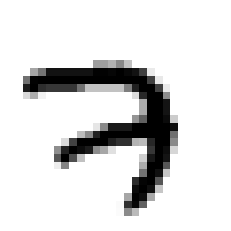

In [111]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9. Conveniently, the class IDs correspond to the digits represented in the images, so we don't need a `class_names` array:

In [112]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [113]:
X_valid.shape

(5000, 28, 28)

In [114]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

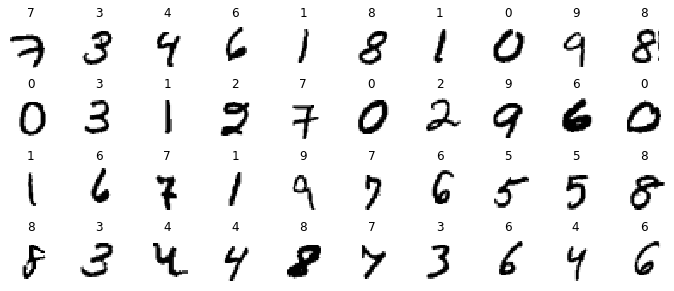

In [115]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Let's build a simple dense network and find the optimal learning rate. We will need a callback to grow the learning rate at each iteration. It will also record the learning rate and the loss at each iteration:

In [116]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [117]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [118]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

We will start with a small learning rate of 1e-3, and grow it by 0.5% at each iteration:

In [119]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

Now let's train the model for just 1 epoch:

In [120]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 [==============================] - 2s 1ms/step - loss: 4.6604 - accuracy: 0.4887 - val_loss: 2.3911 - val_accuracy: 0.1126


We can now plot the loss as a functionof the learning rate:

Text(0, 0.5, 'Loss')

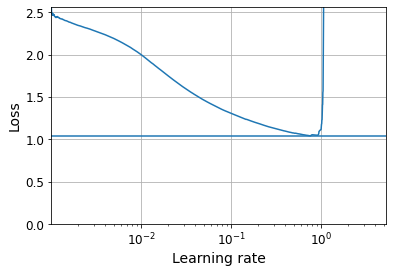

In [121]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

The loss starts shooting back up violently when the learning rate goes over 6e-1, so let's try using half of that, at 3e-1:

In [122]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [123]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [124]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=3e-1),
              metrics=["accuracy"])

In [125]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'./my_mnist_logs/run_001'

In [126]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4195 - accuracy: 0.8677 - val_loss: 0.0995 - val_accuracy: 0.9724
Epoch 2/100
1719/1719 [==============================] - 2s 882us/step - loss: 0.0941 - accuracy: 0.9698 - val_loss: 0.0913 - val_accuracy: 0.9746
Epoch 3/100
1719/1719 [==============================] - 1s 845us/step - loss: 0.0650 - accuracy: 0.9792 - val_loss: 0.0785 - val_accuracy: 0.9772
Epoch 4/100
1719/1719 [==============================] - 2s 932us/step - loss: 0.0438 - accuracy: 0.9855 - val_loss: 0.0793 - val_accuracy: 0.9784
Epoch 5/100
1719/1719 [==============================] - 1s 832us/step - loss: 0.0348 - accuracy: 0.9888 - val_loss: 0.0724 - val_accuracy: 0.9812
Epoch 6/100
1719/1719 [==============================] - 1s 835us/step - loss: 0.0289 - accuracy: 0.9905 - val_loss: 0.0814 - val_accuracy: 0.9792
Epoch 7/100
1719/1719 [==============================] - 1s 868us/step - loss: 0.0230 - accuracy: 0.9926 - val_loss: 0.0

In [127]:
model = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 701us/step - loss: 0.0804 - accuracy: 0.9806


[0.08043695986270905, 0.9805999994277954]

We got over 98% accuracy. Finally, let's look at the learning curves using TensorBoard:

In [128]:
%tensorboard --logdir=./my_mnist_logs --port=6006